<a href="https://colab.research.google.com/github/nse4real/data_analysis_viz_stars_dataset/blob/main/Data_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# First, we'll import pandas, a data processing and CSV file I/O library
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# Next, we'll load the stars dataset, which is in the "../input/" directory
stars = pd.read_csv("/content/drive/MyDrive/stars.csv") # the stars dataset is now a Pandas DataFrame

# Let's see what's in the PS4 data -
stars.head()


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color
0,3068,0.002400,0.1700,16.12,Red
1,3042,0.000500,0.1542,16.60,Red
2,2600,0.000300,0.1020,18.70,Red
3,2800,0.000200,0.1600,16.65,Red
4,1939,0.000138,0.1030,20.06,Red


In [109]:
# Let's see how many examples we have of each star color
stars["Star color"].value_counts()

Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
White-Yellow            1
Blue                    1
Yellowish               1
Orange-Red              1
Blue white              1
Blue-White              1
Name: Star color, dtype: int64

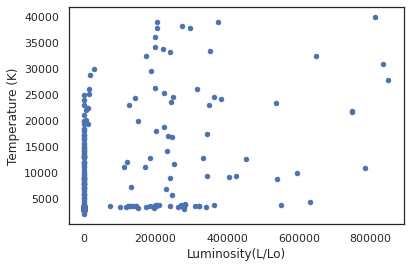

In [110]:
# The first way we can plot things is using the .plot extension from Pandas dataframes
# We'll use this to make a scatterplot of the stars features.
stars.plot(kind="scatter", x="Luminosity(L/Lo)", y="Temperature (K)")

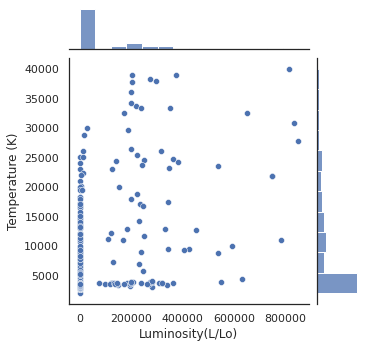

In [111]:
# We can also use the seaborn library to make a similar plot
# A seaborn jointplot shows bivariate scatterplots and univariate histograms in the same figure
sns.jointplot(x="Luminosity(L/Lo)", y="Temperature (K)", data=stars, size=5)

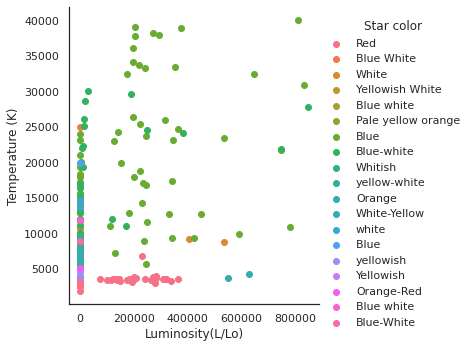

In [112]:
# One piece of information missing in the plots above is what color each star is
# We'll use seaborn's FacetGrid to color the scatterplot by color
sns.FacetGrid(stars, hue="Star color", size=5) \
   .map(plt.scatter, "Luminosity(L/Lo)", "Temperature (K)") \
   .add_legend()

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

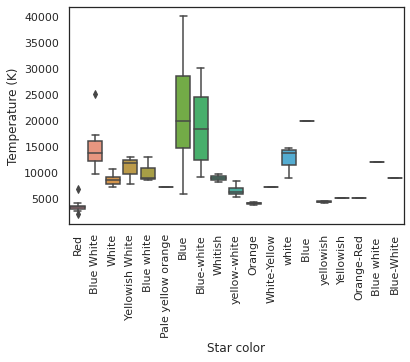

In [113]:
# We can look at an individual feature in Seaborn through a boxplot
#sns.boxplot(x="Star color", y="Temperature (K)", data=stars)
#ax = sns.boxplot(x='Star color', y='Temperature (K)', data=stars)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax = sns.boxplot(x='Star color', y='Temperature (K)', data=stars)
plt.setp(ax.get_xticklabels(), rotation=90)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

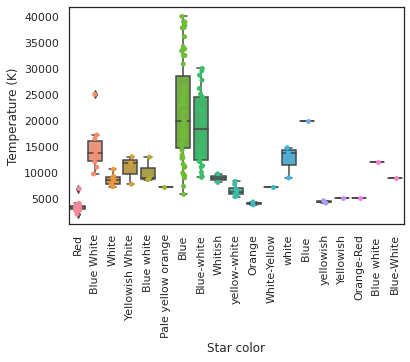

In [114]:
# One way we can extend this plot is adding a layer of individual points on top of
# it through Seaborn's striplot
# 
# We'll use jitter=True so that all the points don't fall in single vertical lines
# above the Star color
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="Star color", y="Temperature (K)", data=stars)
ax = sns.stripplot(x="Star color", y="Temperature (K)", data=stars, jitter=True, edgecolor="gray")
plt.setp(ax.get_xticklabels(), rotation=90)


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

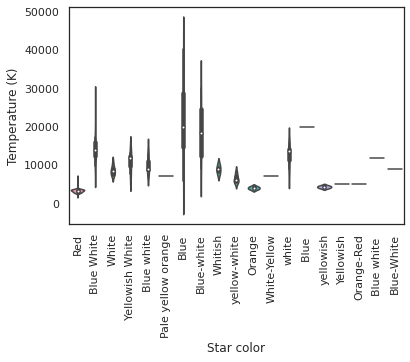

In [115]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
#sns.violinplot(x="Star color", y="Temperature (K)", data=stars, size=6)
ax = sns.violinplot(x="Star color", y="Temperature (K)", data=stars, jitter=True, edgecolor="gray")
plt.setp(ax.get_xticklabels(), rotation=90)

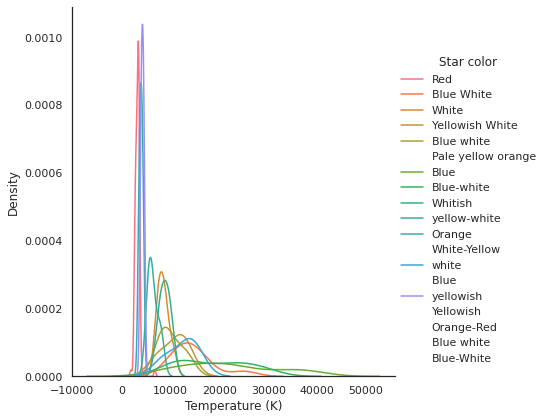

In [116]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(stars, hue="Star color", size=6) \
   .map(sns.kdeplot, "Temperature (K)") \
   .add_legend()

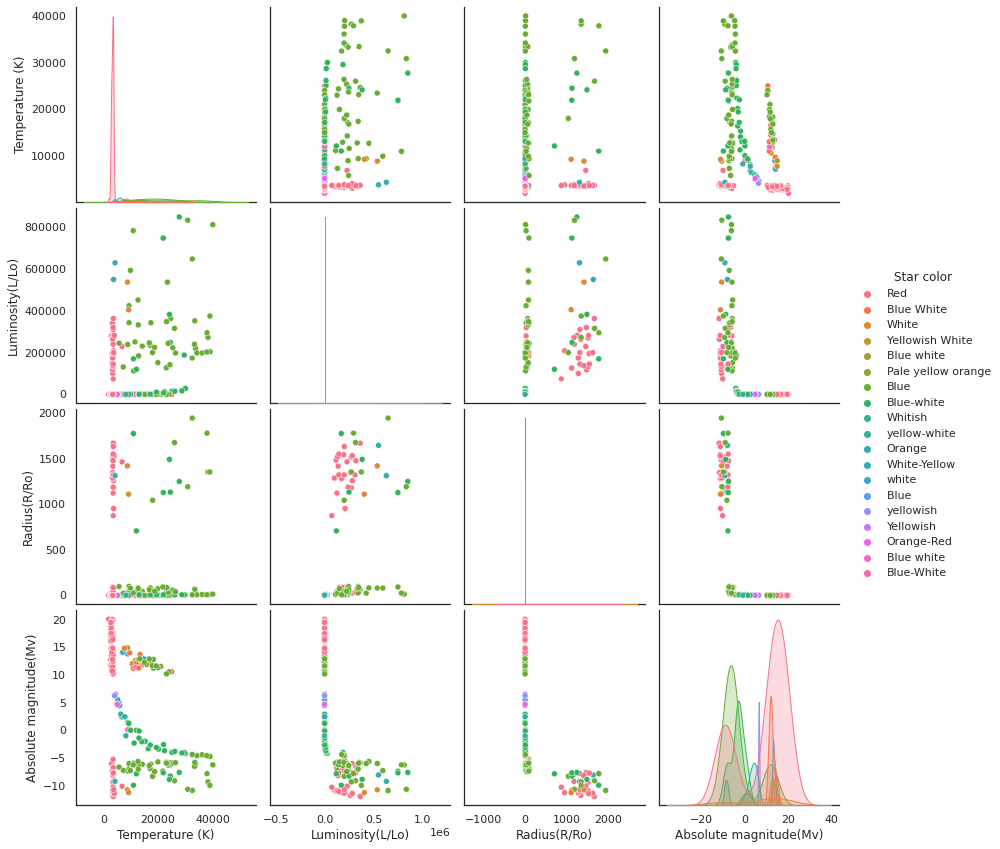

In [117]:
# Another useful seaborn plot is the pairplot, which shows the bivariate relation
# between each pair of features
# two across all feature combinations
sns.pairplot(hue="Star color", size=3, data = stars)

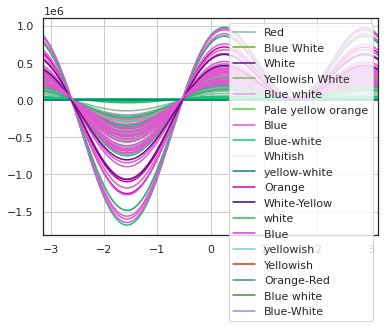

In [118]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.plotting import andrews_curves
andrews_curves(stars, "Star color")

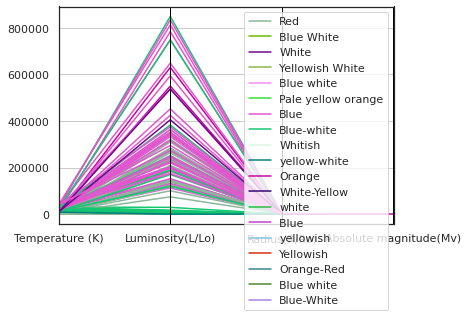

In [119]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(stars, "Star color")

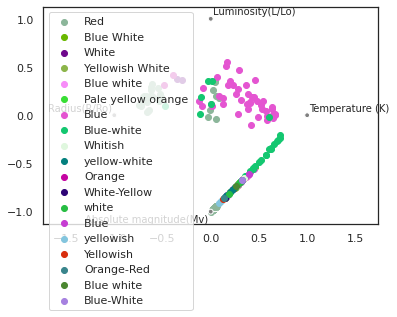

In [120]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.plotting import radviz
radviz(stars, "Star color")